# Section 1

# Decision Tree

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Read "bank-full.csv"

In [2]:
data = pd.read_csv(r"/Users/Cassandra/Downloads/bank-full.csv", delimiter= ";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Check the distribution of labels (‘yes’, ‘no’) are distributed.


In [3]:
data["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

## Counts of "yes" and "no" with "age"

In [4]:
data.groupby("age")["y"].value_counts()

age  y  
18   yes     7
     no      5
19   no     24
     yes    11
20   no     35
            ..
92   yes     2
93   yes     2
94   no      1
95   no      1
     yes     1
Name: y, Length: 148, dtype: int64

## Correlation between the data

In [5]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


Plot the heatmap

<AxesSubplot:>

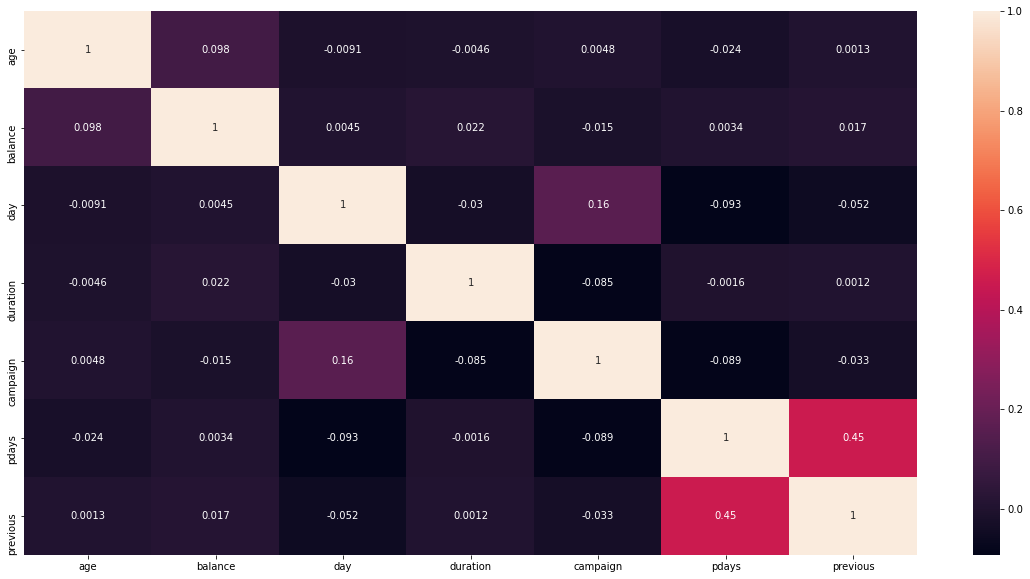

In [6]:
plt.figure(figsize = (20,10))
sns.heatmap(data=data.corr(), annot=True)

## Convert categorical data into numerical

In [7]:
data.default.replace(("yes" , "no"),(1,0),inplace=True)
data.housing.replace(("yes","no"),(1,0),inplace=True)
data.loan.replace(("yes" , "no"),(1,0),inplace=True)
data.y.replace(("yes","no"),(1,0),inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


Next step is to select features and labels

In [8]:
feature_cols = ["default", "housing", "loan"]
X = data[feature_cols]
y = data.y

Drop "poutcome"

In [9]:
data = data.drop(columns = "poutcome", axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,0


## Split the data into train and test

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Applying Decision Tree Classifier:

Next, I created a pipeline of StandardScaler (standardize the features) and DT Classifier (see a note below regarding Standardization of features). We can import DT classifier as from sklearn.tree import DecisionTreeClassifier from Scikit-Learn. To determine the best parameters (criterion of split and maximum tree depth) for DT classifier, I also used Grid Search Cross Validation. The code snippet below is self-explanatory.

In [11]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

## To display

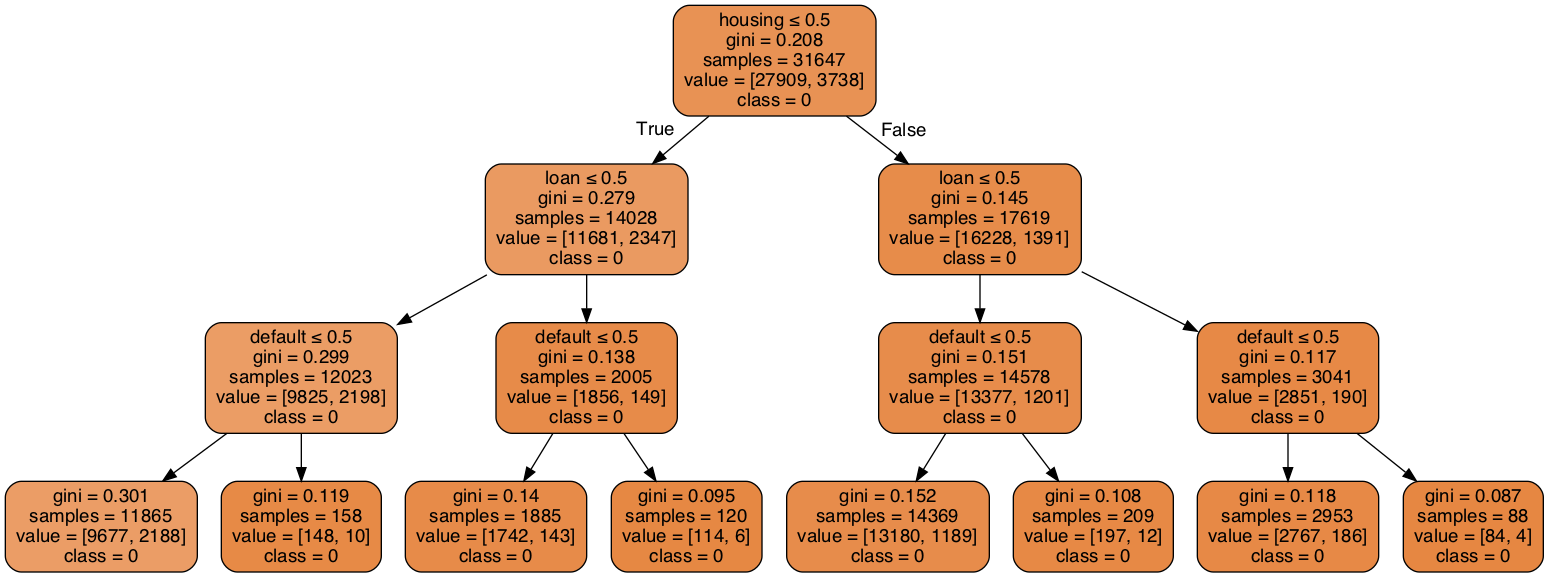

In [12]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True,
               feature_names=feature_cols, class_names=["0","1"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

The number of nodes and the maximum depth

In [13]:
print(classifier.tree_.node_count, classifier.tree_.max_depth)

15 3


## Accuracy measurement

In [14]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.8856531996461221

# Prediction

In [15]:
pd.DataFrame({"Predicted": y_pred})

,Predicted
0,0
1,0
2,0
3,0
4,0
...,...
13559,0
13560,0
13561,0
13562,0


# Grid Search

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[("dec_tree", classifier)])
criterion = ["gini", "entropy"]
max_depth = [2,4,6,8,10,12]

parameters = dict(dec_tree__criterion = criterion, dec_tree__max_depth=max_depth)

grid_search = GridSearchCV(pipe,parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12]})

## Display the best features

In [17]:
print("Best Criterion:", grid_search.best_estimator_.get_params()["dec_tree__criterion"])
print("Best max_depth", grid_search.best_estimator_.get_params()["dec_tree__max_depth"])
print(); print(grid_search.best_estimator_.get_params()["dec_tree"])

Best Criterion: gini
Best max_depth 2

DecisionTreeClassifier(max_depth=2)


## Run DecisionTreeClassifier using the obtained features

In [18]:
optimized_classifier = DecisionTreeClassifier(criterion = "gini", max_depth=2)

optimized_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

## Concat train test results

In [20]:
y_pred_train = optimized_classifier.predict(X_train)
y_pred_test = optimized_classifier.predict(X_test)
y_pred_train = y_pred_train.reshape(len(y_pred_train),1)
y_pred_test = y_pred_test.reshape(len(y_pred_test), 1)

print("Train Result")
print(np.concatenate((y_pred_train, y_train.to_numpy().reshape(len(y_train),1)),1))
print("Test Result")
print(np.concatenate((y_pred_test,y_test.to.numpy().reshape(len(y_test),1)),1))

Train Result
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
Test Result


AttributeError: 'Series' object has no attribute 'to'

# Section 2
1. Read "petrol_consumption.csv" file

In [21]:
dataset = pd.read_csv(r"/Users/Cassandra/Downloads/petrol_consumption.csv")

2. Display the first 5 records

In [22]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


4. Identify the label (Petrol_Consumption)


In [23]:
y = dataset.iloc[:, -1]

5. Identify the features. 

In [24]:
X = dataset.iloc[:, :3]

6. Use of describe method to describe the dataset.

In [25]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


7. Display the first 5 records of the features

In [26]:
X.head()

,Petrol_tax,Average_income,Paved_Highways
0,9.0,3571,1976
1,9.0,4092,1250
2,9.0,3865,1586
3,7.5,4870,2351
4,8.0,4399,431


8. Split the data into training (80%) and testing (20%) sets.

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

9. Build your model and train the training data

In [28]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

10. Prediction using the testing set

In [29]:
y_pred = regressor.predict(X_test)

11. Display Actual and Predictied price side by side in df

In [30]:
df=pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
df

,Actual,Predicted
33,628,487.0
23,547,534.0
38,648,534.0
36,640,635.0
2,561,524.0
3,414,464.0
31,554,571.0
26,577,577.0
44,782,865.0
27,631,574.0


12. Evaluate the model using mean_absulate_error

In [31]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 51.7


13. Display the predicted output using first 5 features.

In [32]:
display = X_test

display["Predicted Output"] = y_pred

display

<ipython-input-32-4934f8a4ac3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  display["Predicted Output"] = y_pred


,Petrol_tax,Average_income,Paved_Highways,Predicted Output
33,7.5,3357,4121,487.0
23,9.0,4258,4686,534.0
38,8.5,3635,3274,534.0
36,5.0,4045,17782,635.0
2,9.0,3865,1586,524.0
3,7.5,4870,2351,464.0
31,7.0,3333,6594,571.0
26,8.0,3448,5399,577.0
44,6.0,5215,2302,865.0
27,7.5,3846,9061,574.0
